In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp, ttest_ind,ttest_ind_from_stats  
from scipy.stats import norm, t
from scipy.stats import f_oneway  
from scipy.stats import kruskal   
from scipy.stats import chi2_contingency  

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import kstest

In [3]:
df=pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

##### 10886 Rows and 12 Columns are present in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

##### There is no null value in any column.

### Checking for categorical columns and unique values

In [7]:
df.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [8]:
df.holiday.unique()

array([0, 1], dtype=int64)

In [9]:
df.workingday.unique()

array([0, 1], dtype=int64)

In [10]:
df.weather.unique()

array([1, 2, 3, 4], dtype=int64)

In [11]:
df.iloc[:,5:].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


##### convert datetime column to date and time column.

In [12]:
df['Dates'] = pd.to_datetime(df['datetime']).dt.date
df['Time'] = pd.to_datetime(df['datetime']).dt.time
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Dates,Time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00


In [13]:
df.groupby('Dates')['datetime'].nunique()

Dates
2011-01-01    24
2011-01-02    23
2011-01-03    22
2011-01-04    23
2011-01-05    23
              ..
2012-12-15    24
2012-12-16    24
2012-12-17    24
2012-12-18    24
2012-12-19    24
Name: datetime, Length: 456, dtype: int64

In [14]:
df['Dates'].min(),df['Dates'].max()

(datetime.date(2011, 1, 1), datetime.date(2012, 12, 19))

#### Data is available from 2011-01-01 to 2012-12-19

### Value counts for categorical columns

In [16]:
for i in ['season','holiday','workingday','weather']:
    print(df[i].value_counts())
    print('')

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

0    10575
1      311
Name: holiday, dtype: int64

1    7412
0    3474
Name: workingday, dtype: int64

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64



In [17]:
for i in ['season','holiday','workingday','weather']:
    print(df.groupby(i)['count'].mean())
    print('           ')

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64
           
holiday
0    191.741655
1    185.877814
Name: count, dtype: float64
           
workingday
0    188.506621
1    193.011873
Name: count, dtype: float64
           
weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64
           


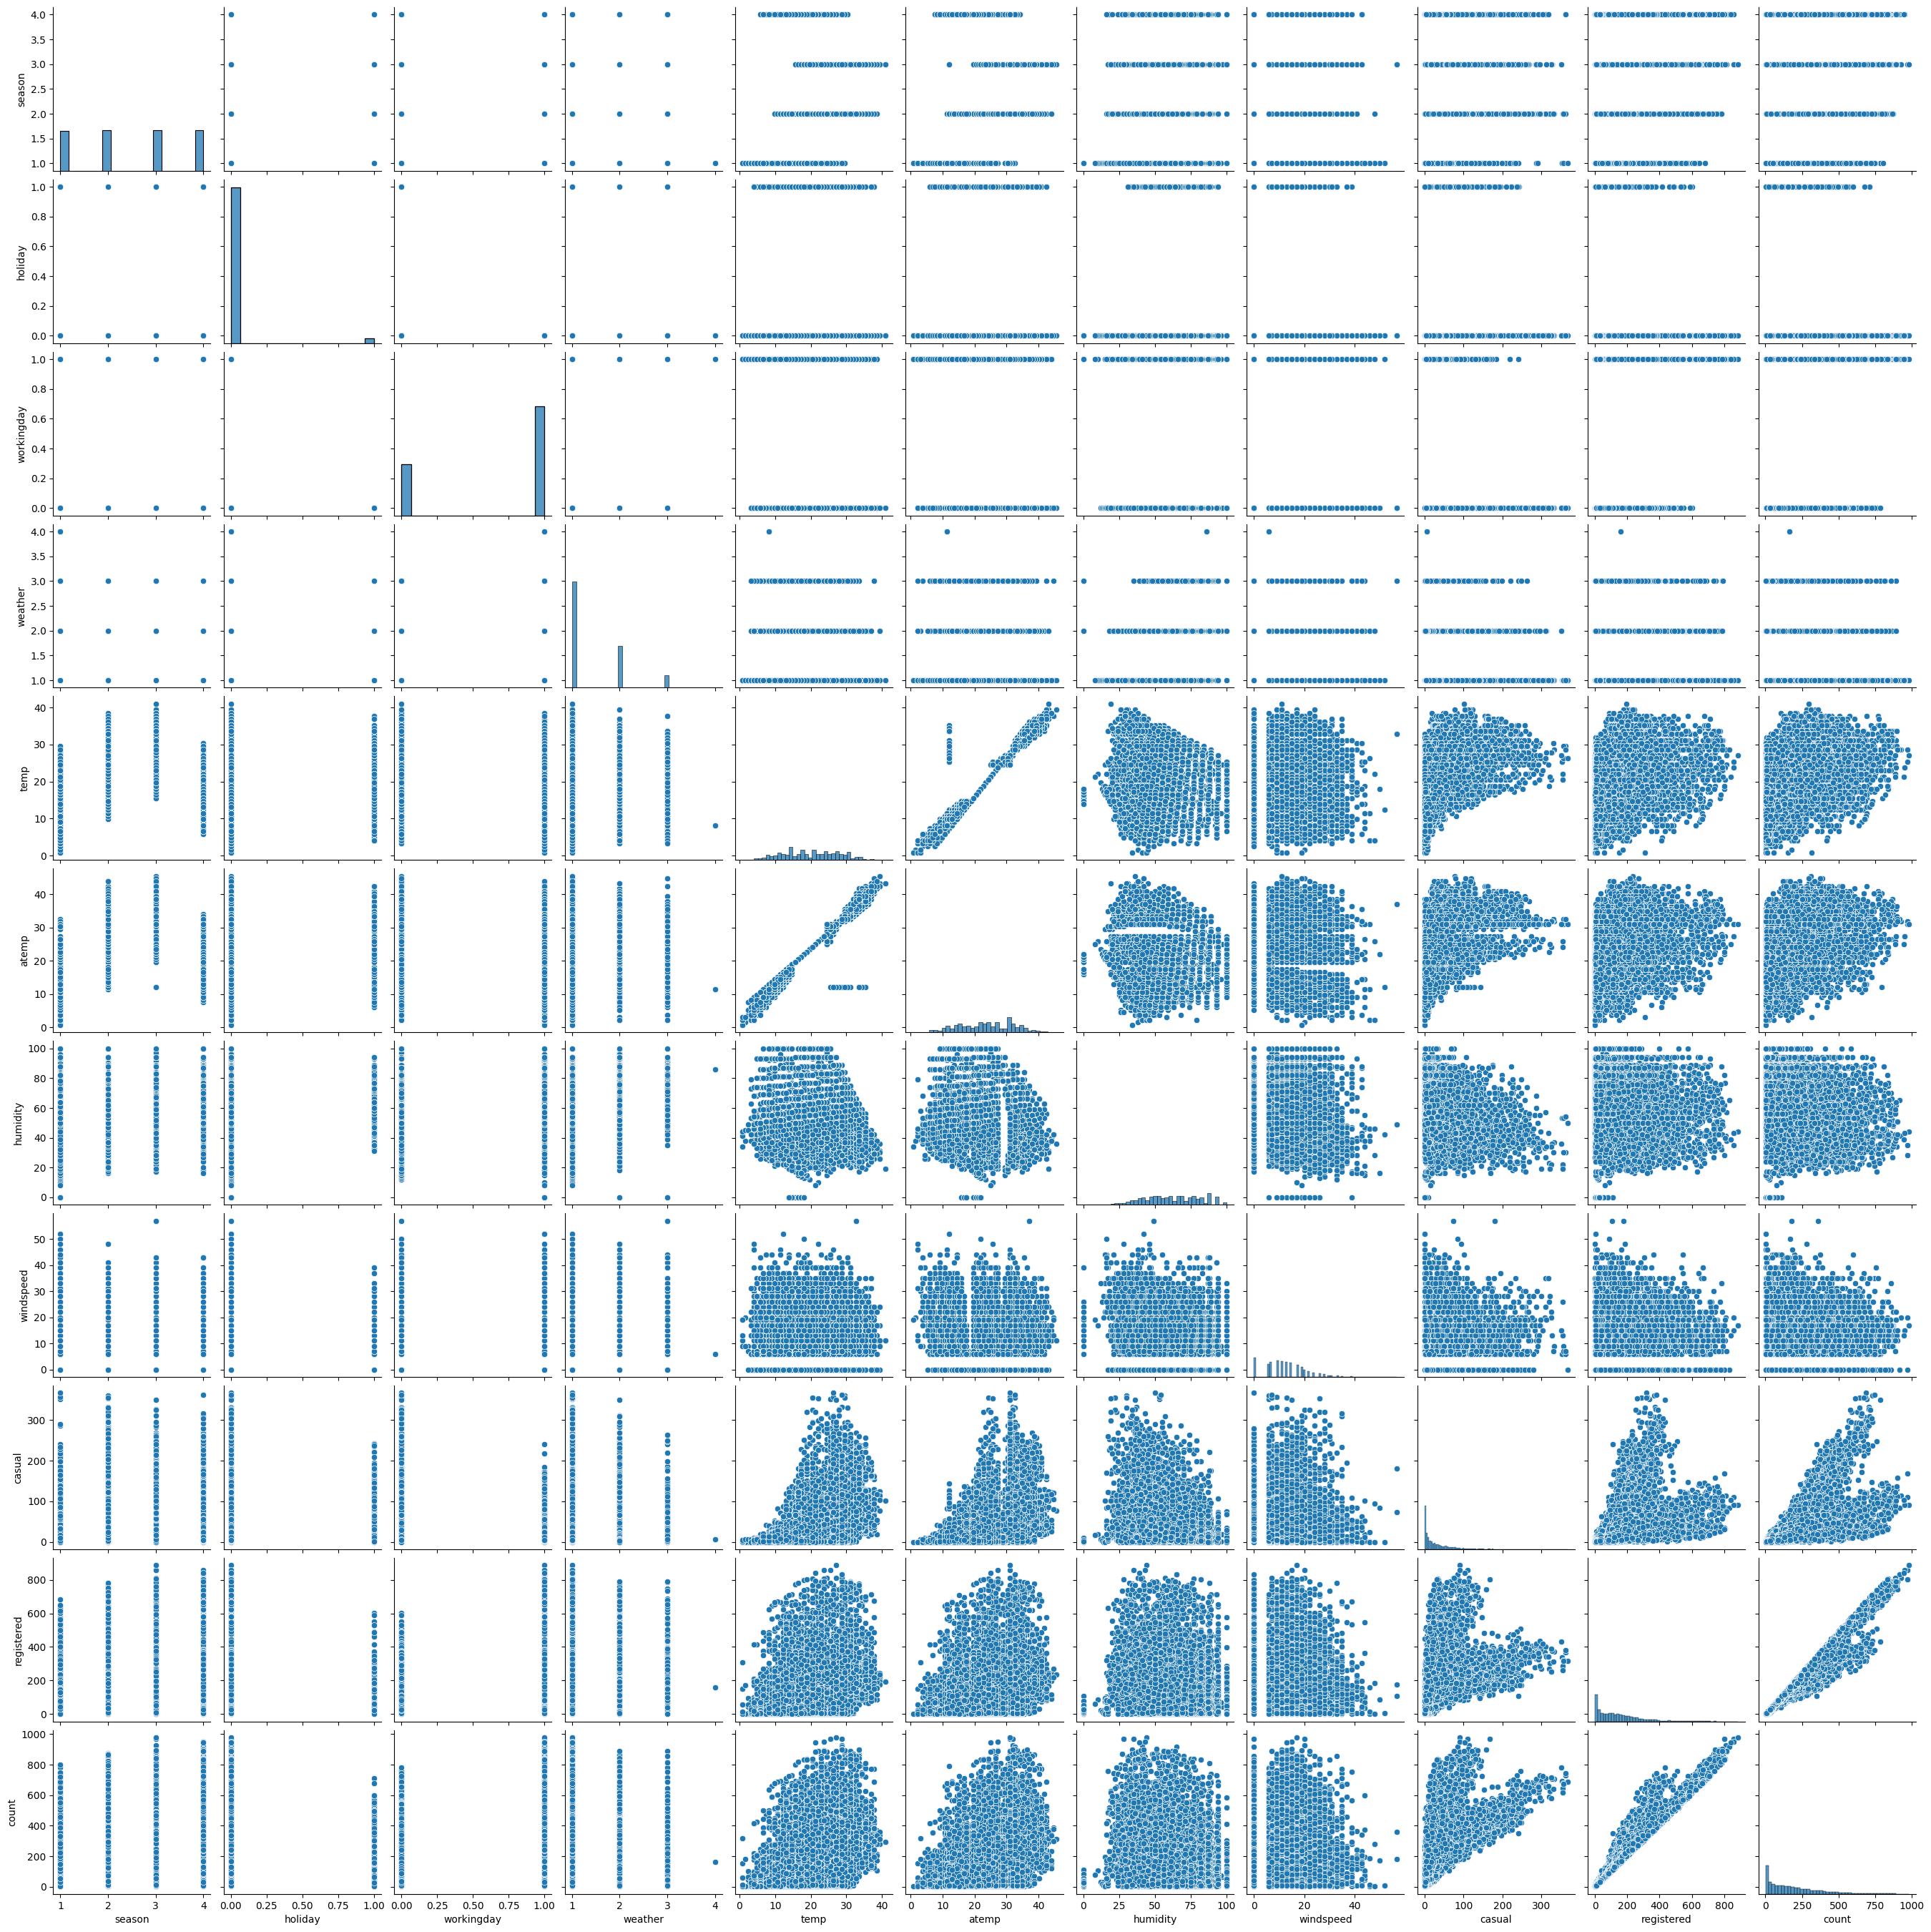

In [81]:
sns.pairplot(df)

### Box plot between Vehicle rented and categorical columns (season,weather,workingday)

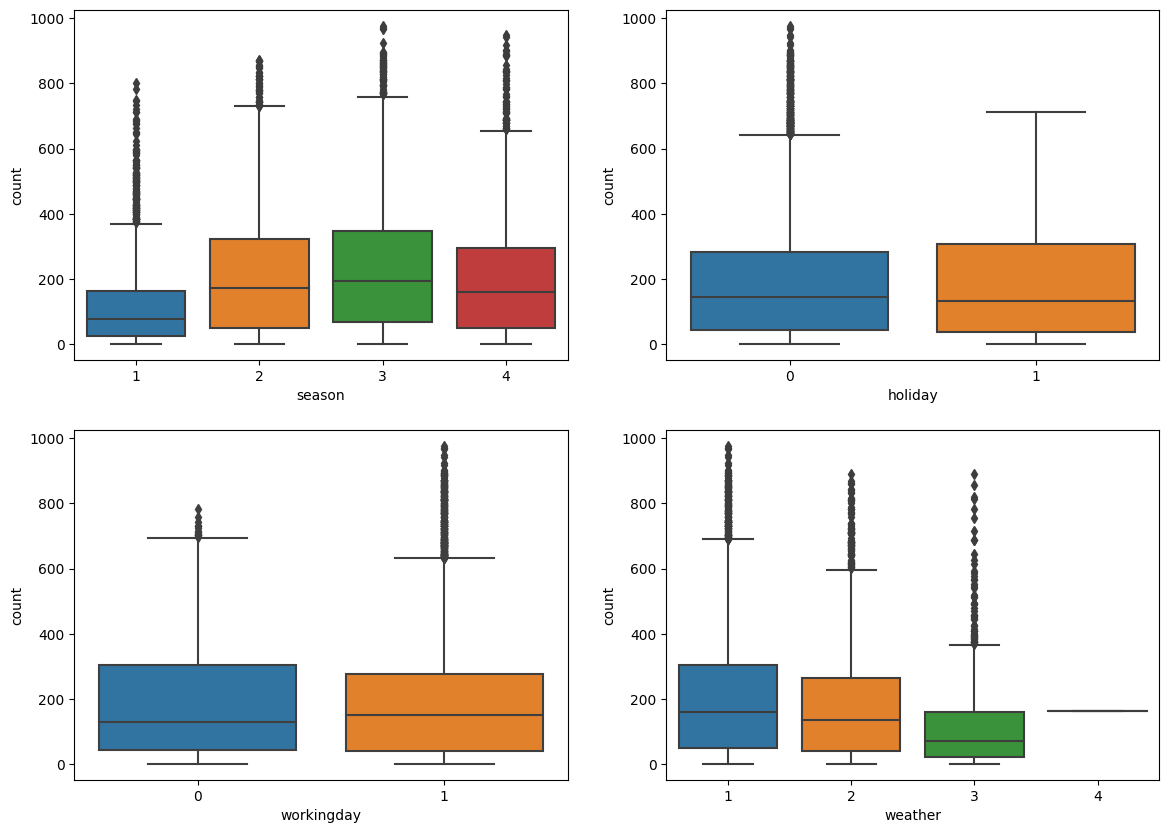

In [19]:
f,ax=plt.subplots(2,2,figsize=(14,10))
sns.boxplot(ax=ax[0,0],data=df,y='count',x='season')
sns.boxplot(ax=ax[0,1],data=df,y='count',x='holiday')
sns.boxplot(ax=ax[1,0],data=df,y='count',x='workingday')
sns.boxplot(ax=ax[1,1],data=df,y='count',x='weather')
plt.show()

#### Many outlier present in count column for various categories

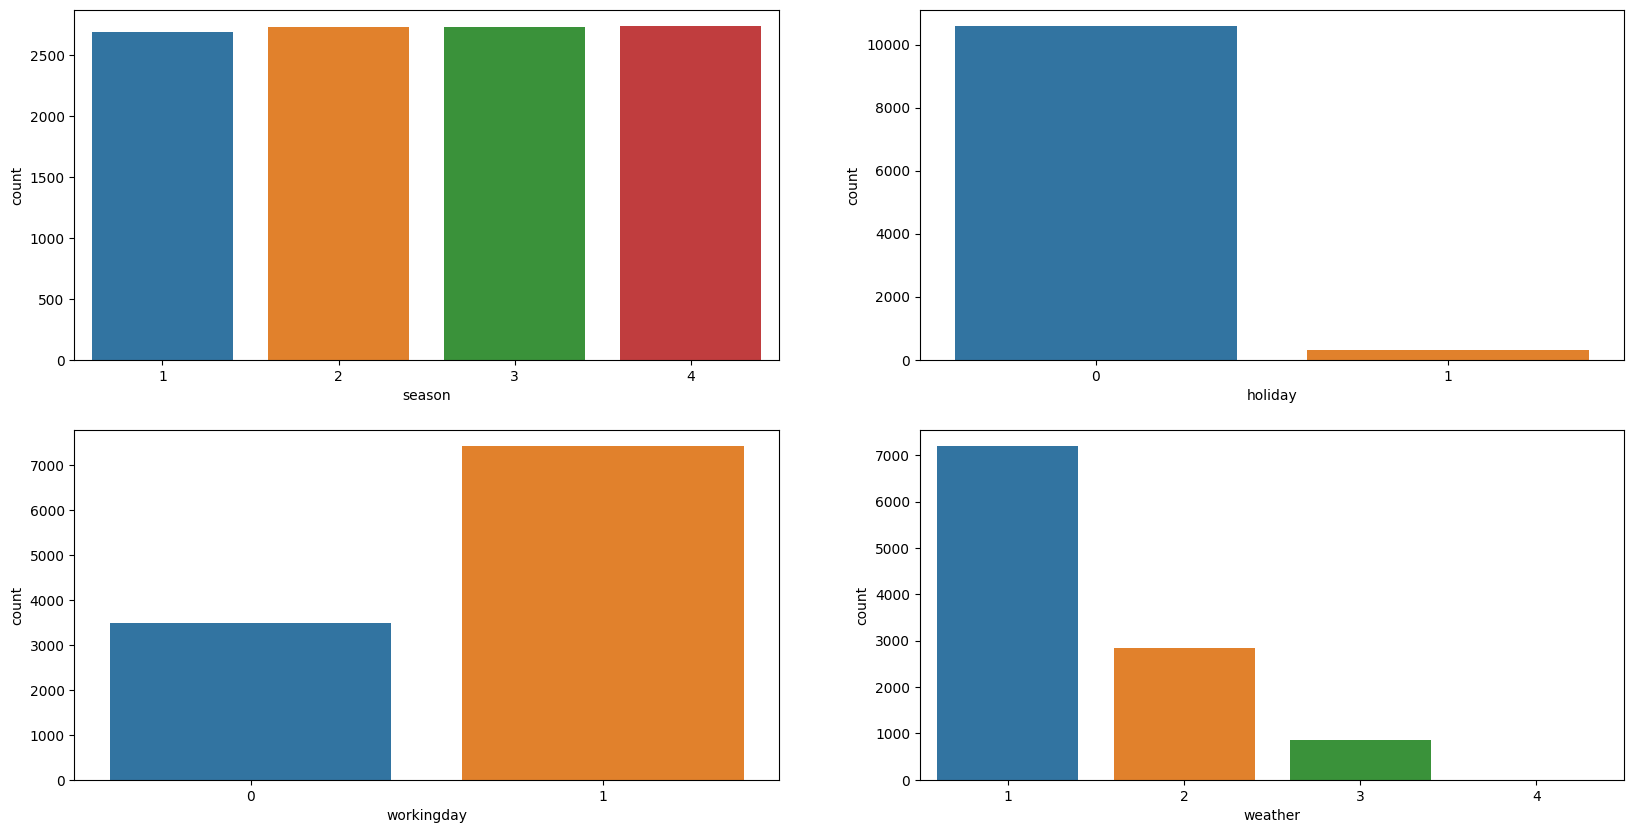

In [20]:
f,ax=plt.subplots(2,2,figsize=(20,10))
sns.countplot(ax=ax[0,0],data=df,x='season')
sns.countplot(ax=ax[0,1],data=df,x='holiday')
sns.countplot(ax=ax[1,0],data=df,x='workingday')
sns.countplot(ax=ax[1,1],data=df,x='weather')
plt.show()

In [21]:
season_df_cnt=df.groupby('season')['count'].sum().reset_index()
holiday_df_cnt=df.groupby('holiday')['count'].sum().reset_index()
workingday_df_cnt=df.groupby('workingday')['count'].sum().reset_index()
weather_df_cnt=df.groupby('weather')['count'].sum().reset_index()

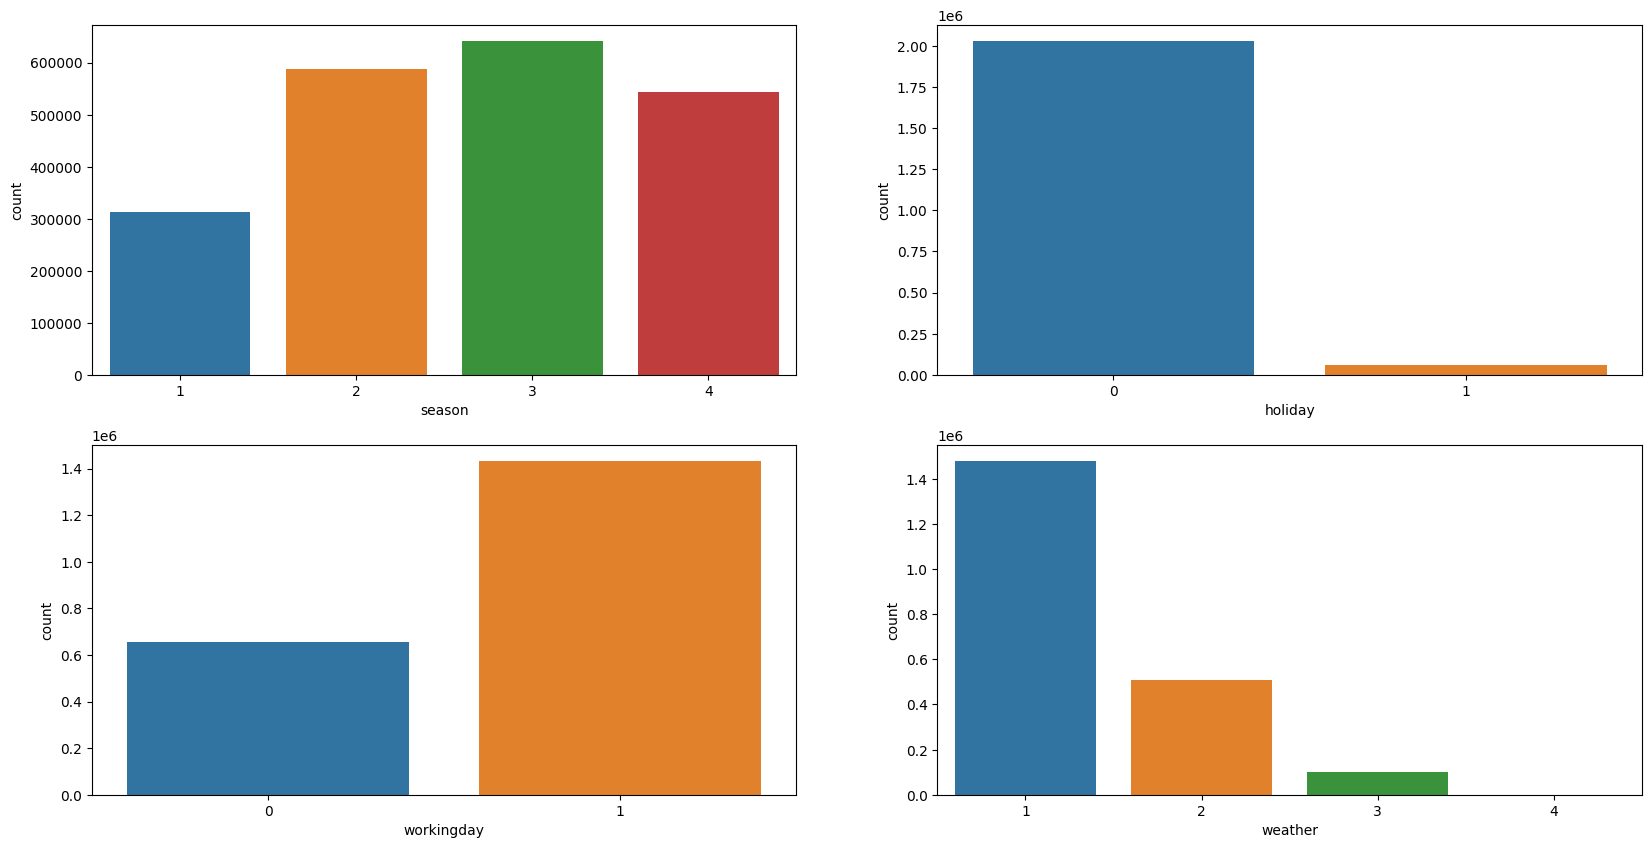

In [22]:
f,ax=plt.subplots(2,2,figsize=(20,10))
sns.barplot(ax=ax[0,0],data=season_df_cnt,x='season',y='count')
sns.barplot(ax=ax[0,1],data=holiday_df_cnt,x='holiday',y='count')
sns.barplot(ax=ax[1,0],data=workingday_df_cnt,x='workingday',y='count')
sns.barplot(ax=ax[1,1],data=weather_df_cnt,x='weather',y='count')
plt.show()

In [23]:
df['datetime'] = pd.to_datetime(df.datetime, format='%Y-%m-%d %H:%M:%S')

In [24]:
df['Year_Month']=df['datetime'].dt.to_period('M')

In [25]:
grp_df=df.groupby('Year_Month')['count'].sum().reset_index()

### Line Plot for Trending

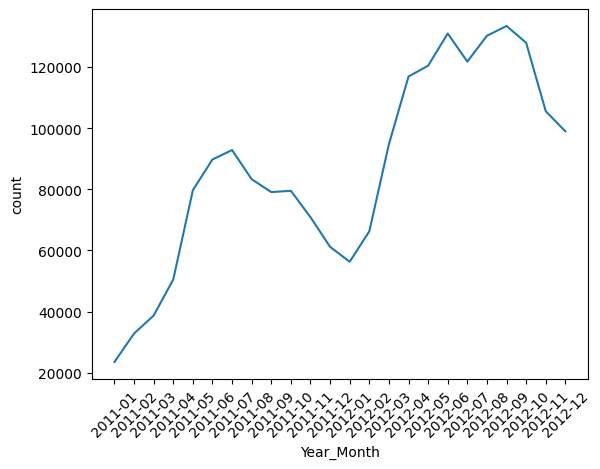

In [26]:
sns.lineplot(data=grp_df,x=grp_df.Year_Month.astype(str),y='count')
plt.xticks(rotation = 45)
plt.show()

### Checking for Working day has effect on vehicle rented or not?

In [27]:
df[df['workingday']==0]['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10809    109
10810    122
10811    106
10812     89
10813     33
Name: count, Length: 3474, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

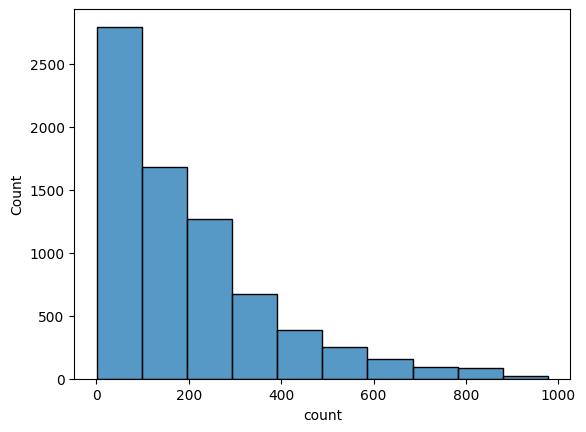

In [28]:
sns.histplot(df[df['workingday']==1]['count'],bins=10)

#### QQ and Histogram plot

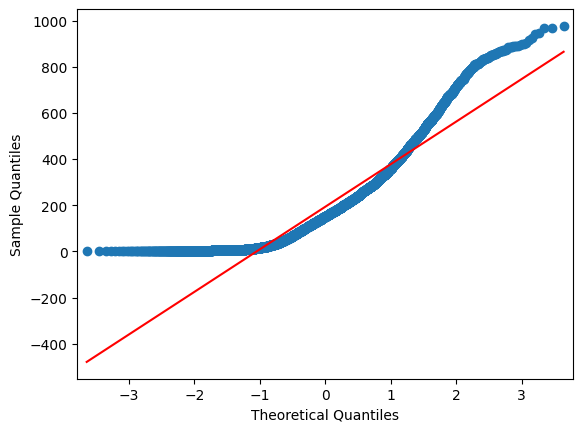

In [29]:
qqplot(df[df['workingday']==1]['count'], line ='s')
plt.show()

<Axes: xlabel='count', ylabel='Count'>

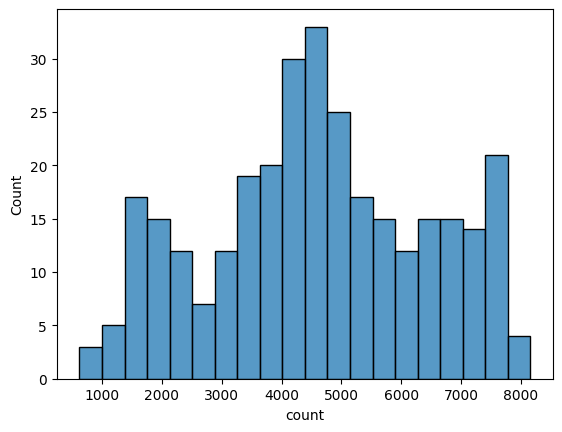

In [30]:
sns.histplot(df[df['workingday']==1].groupby('Dates')['count'].sum().reset_index()['count'],bins=20)

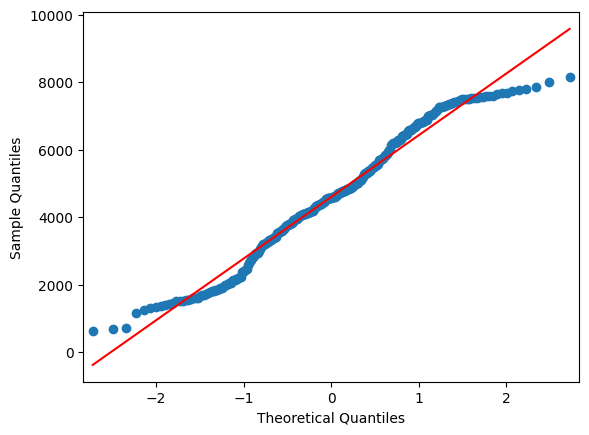

In [31]:
qqplot(df[df['workingday']==1].groupby('Dates')['count'].sum().reset_index()['count'], line ='s')
plt.show()

#### Shapiro test for working day

In [32]:
def data_check_shapiro(data):
    #H0 is Gaussian
    #Ha is not Gaussian
    t_stats,p_value=shapiro(data)
    print(t_stats,p_value)
    if p_value<0.05:
        print('Reject the null Hypothesis')
        print('Data is not Gaussian')
    else:
        print('Failed to Reject the null Hypo')
        print('Data is Gaussian')

In [33]:
data_check_shapiro(df[df['workingday']==1].groupby('Dates')['count'].sum().reset_index()['count'].sample(100))

0.9494524598121643 0.0007636065711267292
Reject the null Hypothesis
Data is not Gaussian


#### KSTest for Working day

In [34]:
working_day_sample=df[df['workingday']==1].groupby('Dates')['count'].sum().reset_index()['count']

In [35]:
#H0 is Gaussian
#Ha is not Gaussian
mu=working_day_sample.mean()
sigma=working_day_sample.std()
t_stats,p_value=kstest(working_day_sample,norm.cdf,args=(mu,sigma))
print(t_stats,p_value)
if p_value<0.05:
    print('Reject the null Hypothesis')
    print('Data is not Gaussian')
else:
    print('Failed to Reject the null Hypo')
    print('Data is Gaussian')

0.05302826473734157 0.33426593261380666
Failed to Reject the null Hypo
Data is Gaussian


<Axes: xlabel='count', ylabel='Count'>

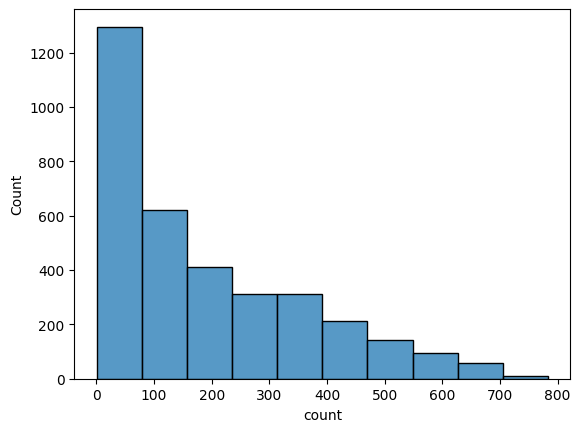

In [36]:
sns.histplot(df[df['workingday']==0]['count'],bins=10)

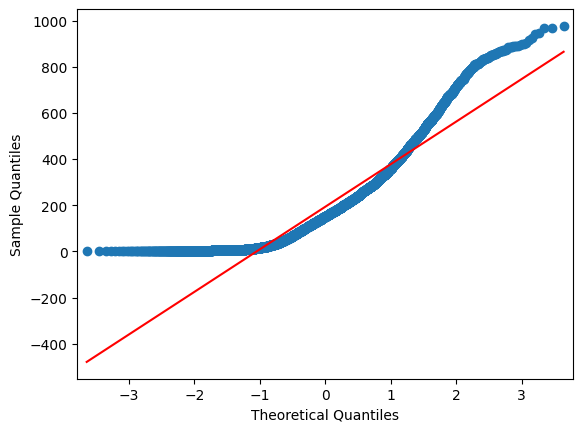

In [37]:
qqplot(df[df['workingday']==1]['count'], line ='s')
plt.show()

<Axes: xlabel='count', ylabel='Count'>

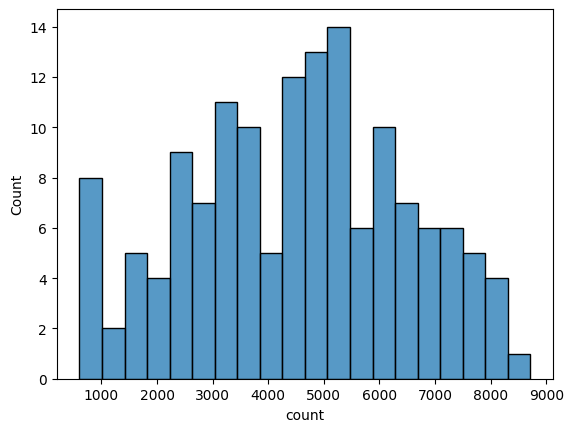

In [38]:
sns.histplot(df[df['workingday']==0].groupby('Dates')['count'].sum().reset_index()['count'],bins=20)

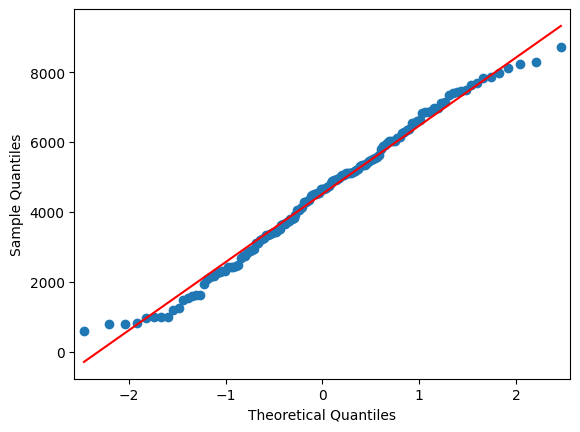

In [39]:
qqplot(df[df['workingday']==0].groupby('Dates')['count'].sum().reset_index()['count'], line ='s')
plt.show()

#### Shapiro test for Working day

In [40]:
data_check_shapiro(df[df['workingday']==0].groupby('Dates')['count'].sum().reset_index()['count'].sample(100))

0.9831583499908447 0.2322859913110733
Failed to Reject the null Hypo
Data is Gaussian


#### KSTest for Non Working day

In [41]:
non_working_day_sample=df[df['workingday']==0].groupby('Dates')['count'].sum().reset_index()['count']

In [42]:
#H0: Data is Gaussian
#Ha: Data is not Gaussian
mu=non_working_day_sample.mean()
sigma=non_working_day_sample.std()
t_stats,p_value=kstest(non_working_day_sample,norm.cdf,args=(mu,sigma))
print(t_stats,p_value)
if p_value<0.05:
    print('Reject the null Hypothesis')
    print('Data is not Gaussian')
else:
    print('Failed to Reject the null Hypo')
    print('Data is Gaussian')

0.04258907386742494 0.9449794587094945
Failed to Reject the null Hypo
Data is Gaussian


### T_test (checking impact for working day on vehicle rented)

In [43]:
working_day_sample.mean(),non_working_day_sample.mean()

(4600.012861736334, 4516.358620689655)

In [44]:
#H0: Working day and Non working day has no impact on vehicle booking
#Ha: Working day and Non working day has impact on vehicle booking
t_stats,p_value=ttest_ind(working_day_sample,non_working_day_sample)
print(t_stats,p_value)
if p_value<0.05:
    print('Reject the null Hypothesis')
    print('Working day has impact on vehicle rented')
else:
    print('Failed to Reject the null Hypo')
    print('Working day has no impact on vehicle rented')

0.44477221614881995 0.656696335987859
Failed to Reject the null Hypo
Working day has no impact on vehicle rented


### Impact of Season on Vehicle rented

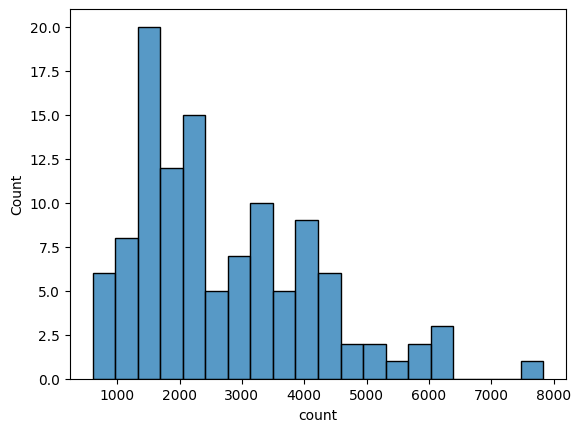

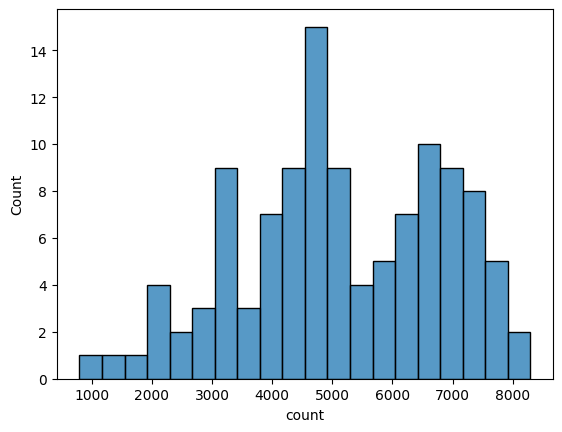

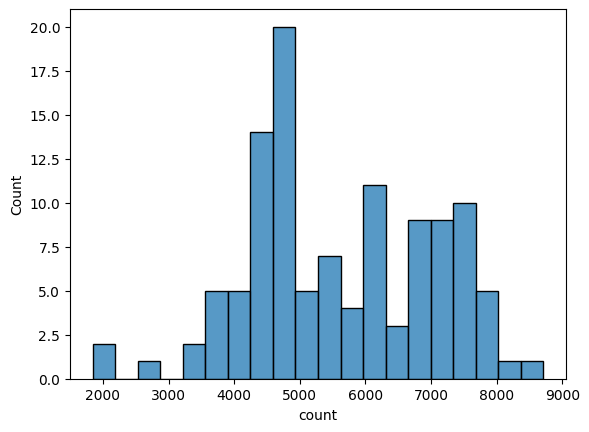

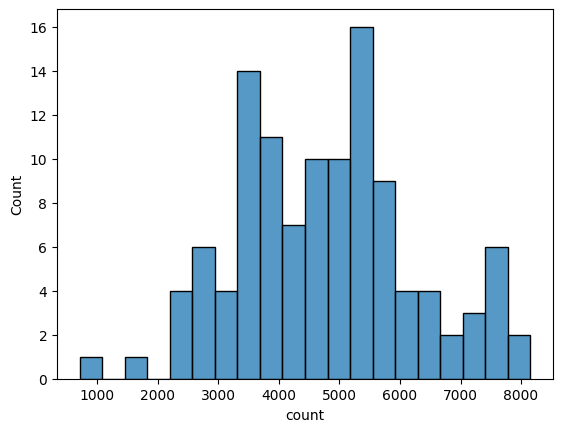

In [45]:
for i in range(1,5):
    plt.figure(i)
    sns.histplot(df[df['season']==i].groupby('Dates')['count'].sum().reset_index()['count'],bins=20)
plt.show()

<Figure size 640x480 with 0 Axes>

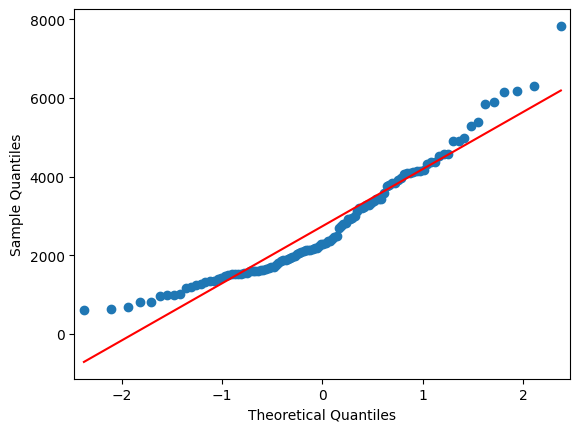

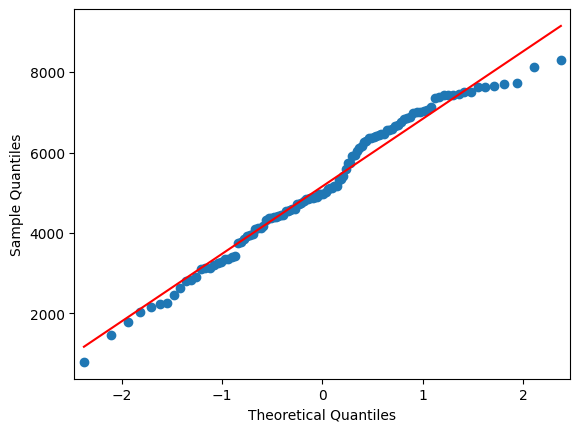

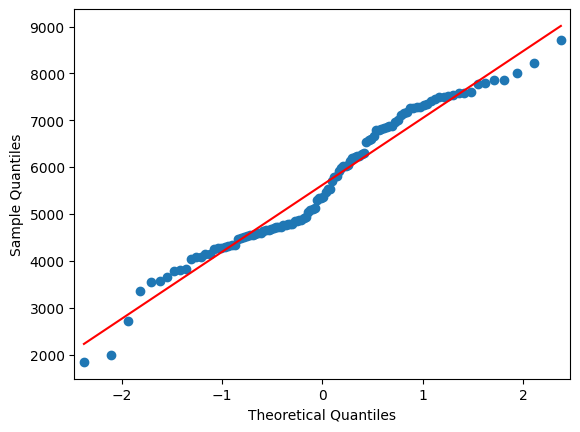

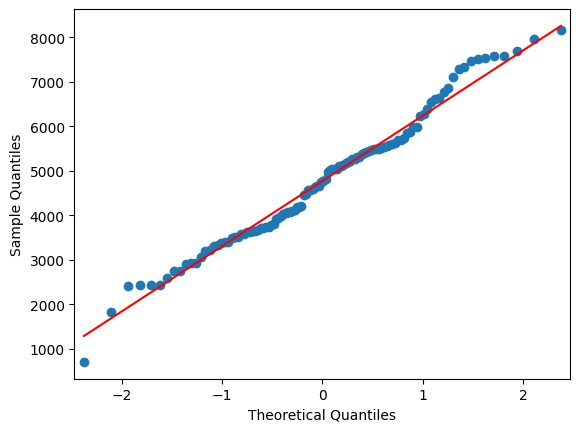

In [46]:
for i in range(1,5):
    plt.figure(i)
    qqplot(df[df['season']==i].groupby('Dates')['count'].sum().reset_index()['count'], line ='s')
plt.show()

#### Checking for data is gaussian or not

In [47]:
def  KS_test(data):
    #H0: Data is Gaussian
    #Ha: Data is not Gaussian
    mu=data.mean()
    sigma=data.std()
    t_stats,p_value=kstest(data,norm.cdf,args=(mu,sigma))
    print(t_stats,p_value)
    if p_value<0.05:
        print('Reject the null Hypothesis')
        print('Data is not Gaussian')
    else:
        print('Failed to Reject the null Hypo')
        print('Data is Gaussian')

In [48]:
season1=df[df['season']==1].groupby('Dates')['count'].sum().reset_index()['count']
KS_test(season1)

0.13398134205200352 0.03026253568592141
Reject the null Hypothesis
Data is not Gaussian


In [49]:
data_check_shapiro(season1)

0.9294025301933289 1.4321534763439558e-05
Reject the null Hypothesis
Data is not Gaussian


In [50]:
season2=df[df['season']==2].groupby('Dates')['count'].sum().reset_index()['count']
KS_test(season2)

0.08768043396996406 0.32561781264244505
Failed to Reject the null Hypo
Data is Gaussian


In [51]:
data_check_shapiro(season2)

0.9752597212791443 0.032791439443826675
Reject the null Hypothesis
Data is not Gaussian


In [52]:
season3=df[df['season']==3].groupby('Dates')['count'].sum().reset_index()['count']
KS_test(season3)

0.12096314023207472 0.06532987577734417
Failed to Reject the null Hypo
Data is Gaussian


In [53]:
data_check_shapiro(season3)

0.9641115069389343 0.003765953006222844
Reject the null Hypothesis
Data is not Gaussian


In [54]:
season4=df[df['season']==4].groupby('Dates')['count'].sum().reset_index()['count']
KS_test(season4)

0.07108655293602184 0.5869382037661304
Failed to Reject the null Hypo
Data is Gaussian


In [55]:
data_check_shapiro(season4)

0.9835520386695862 0.17639805376529694
Failed to Reject the null Hypo
Data is Gaussian


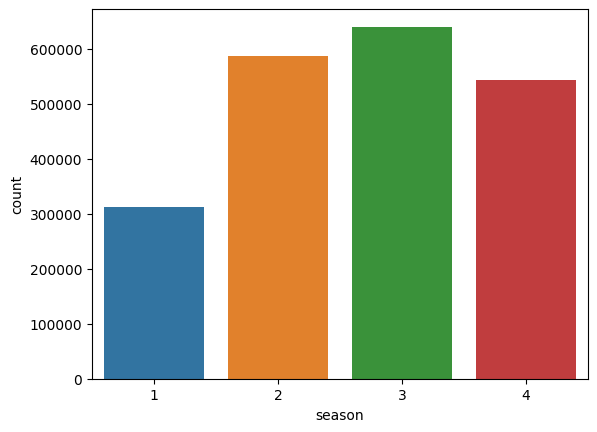

In [56]:
sns.barplot(data=season_df_cnt,x='season',y='count')
plt.show()

### ANOVA & T_test for diff seasons

In [57]:
#H0: All season have same impact on vehicle rented
#Ha: They have diff impact on vehicle rented
t_stats,p_value=f_oneway(season1,season2,season3,season4)
print(t_stats,p_value)
if p_value<0.05:
    print('Reject the null Hypothesis')
else:
    print('Failed to Reject the null Hypo')

80.0504789788067 1.506580502991204e-41
Reject the null Hypothesis


In [58]:
#H0: season=1 = season=2 (have same impact on vehicle rented)
#Ha: season=1 < season=2 
t_stats,p_value=ttest_ind(season1,season2,alternative='less')
print(t_stats,p_value)
if p_value<0.05:
    print('Reject the null Hypothesis')
else:
    print('Failed to Reject the null Hypo')

-11.595074811573586 5.317639344852144e-25
Reject the null Hypothesis


In [59]:
#H0: season=1 = season=3 (have same impact on vehicle rented)
#Ha: season=1 < season=3 
t_stats,p_value=ttest_ind(season1,season3,alternative='less')
print(t_stats,p_value)
if p_value<0.05:
    print('Reject the null Hypothesis')
else:
    print('Failed to Reject the null Hypo')

-15.032989259160274 3.602660145428408e-36
Reject the null Hypothesis


In [60]:
#H0: season=1 = season=4 (have same impact on vehicle rented)
#Ha: season=1 < season=4
t_stats,p_value=ttest_ind(season1,season4,alternative='less')
print(t_stats,p_value)
if p_value<0.05:
    print('Reject the null Hypothesis')
else:
    print('Failed to Reject the null Hypo')

-10.467526455174626 1.834290366433615e-21
Reject the null Hypothesis


In [61]:
#H0: season=2 = season=3 (have same impact on vehicle rented)
#Ha: season=2 < season=3
t_stats,p_value=ttest_ind(season2,season3,alternative='less')
print(t_stats,p_value)
if p_value<0.05:
    print('Reject the null Hypothesis')
else:
    print('Failed to Reject the null Hypo')

-2.2183131652796177 0.013764168439496526
Reject the null Hypothesis


In [62]:
#H0: season=2 = season=4 (have same impact on vehicle rented)
#Ha: season=2 > season=4
t_stats,p_value=ttest_ind(season2,season4,alternative='greater')
print(t_stats,p_value)
if p_value<0.05:
    print('Reject the null Hypothesis')
else:
    print('Failed to Reject the null Hypo')

1.8528715111050933 0.03260221467964598
Reject the null Hypothesis


In [63]:
#H0: season=3 = season=4 (have same impact on vehicle rented)
#Ha: season=3 > season=4
t_stats,p_value=ttest_ind(season3,season4,alternative='greater')
print(t_stats,p_value)
if p_value<0.05:
    print('Reject the null Hypothesis')
else:
    print('Failed to Reject the null Hypo')

4.405326707141122 8.156224931564122e-06
Reject the null Hypothesis


#### Impact of    season=3 > season=2 > season=4 > season=1    on Vehicle rented

### Impact of Weather on Vehicle rented

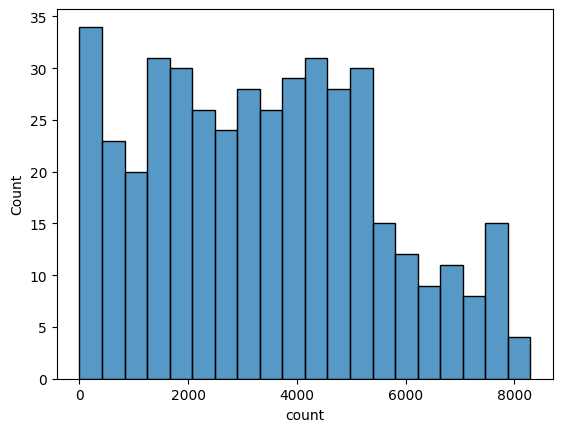

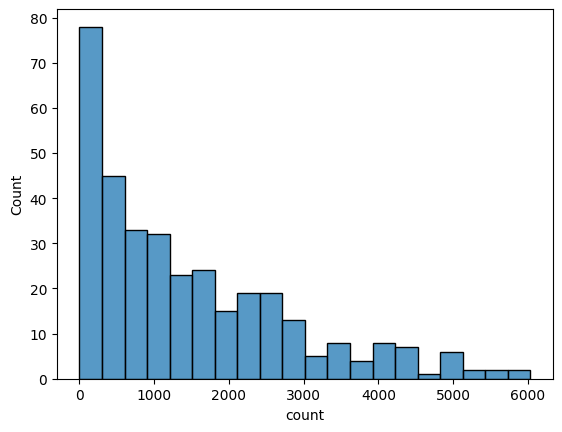

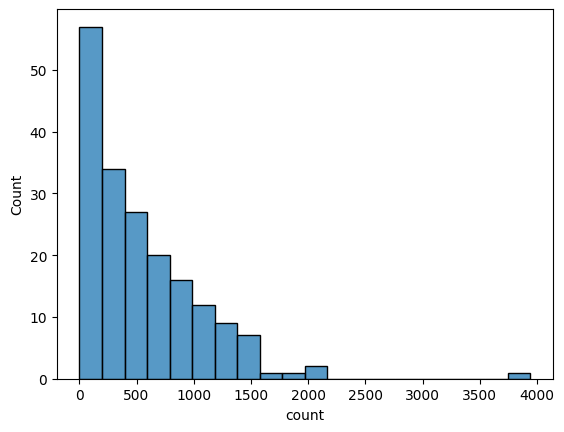

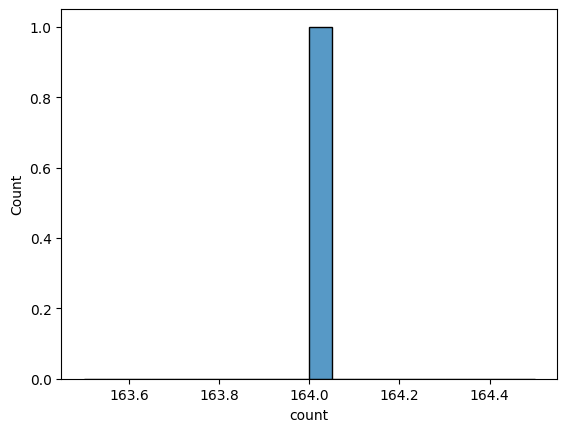

In [64]:
for i in range(1,5):
    plt.figure(i)
    sns.histplot(df[df['weather']==i].groupby('Dates')['count'].sum().reset_index()['count'],bins=20)
plt.show()

##### There is only 1 day data present for weather=4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) so that means in heavy rain an d thunderstorm has high -ve impact on vehicle rented.

<Figure size 640x480 with 0 Axes>

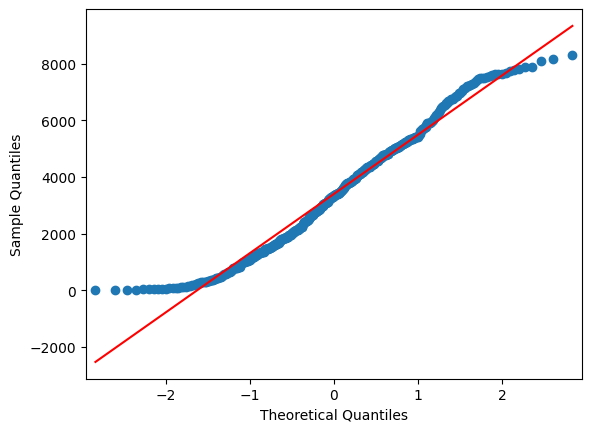

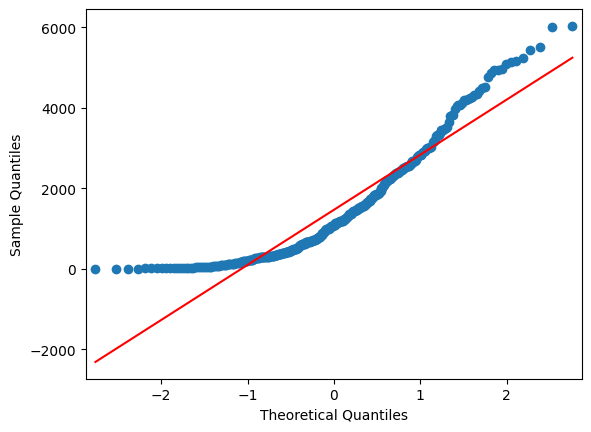

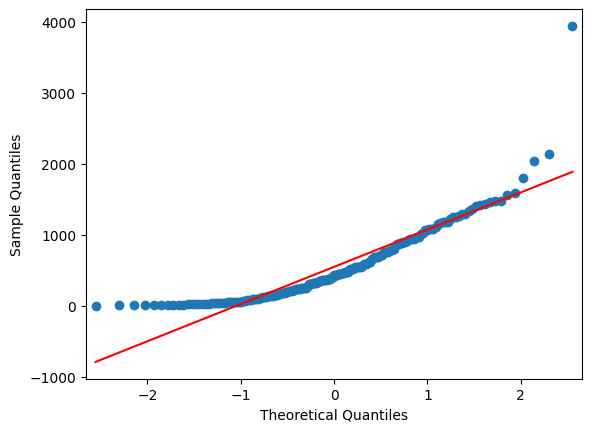

In [65]:
for i in range(1,4):
    plt.figure(i)
    qqplot(df[df['weather']==i].groupby('Dates')['count'].sum().reset_index()['count'], line ='s')
plt.show()

#### Checking for data is gaussian or not

In [66]:
def  KS_test(data):
    #H0: Data is Gaussian
    #Ha: Data is not Gaussian
    mu=data.mean()
    sigma=data.std()
    t_stats,p_value=kstest(data,norm.cdf,args=(mu,sigma))
    print(t_stats,p_value)
    if p_value<0.05:
        print('Reject the null Hypothesis')
        print('Data is not Gaussian')
    else:
        print('Failed to Reject the null Hypo')
        print('Data is Gaussian')

In [67]:
weather1=df[df['weather']==1].groupby('Dates')['count'].sum().reset_index()['count'].sample(100)
KS_test(weather1)

0.0958771718612409 0.2975340489934575
Failed to Reject the null Hypo
Data is Gaussian


In [68]:
data_check_shapiro(weather1)

0.956808865070343 0.002397000789642334
Reject the null Hypothesis
Data is not Gaussian


In [69]:
weather2=df[df['weather']==2].groupby('Dates')['count'].sum().reset_index()['count'].sample(100)
KS_test(weather2)

0.12729805196362026 0.07153587302002118
Failed to Reject the null Hypo
Data is Gaussian


In [70]:
data_check_shapiro(weather2)

0.9086599349975586 3.6970170640415745e-06
Reject the null Hypothesis
Data is not Gaussian


In [71]:
weather3=df[df['weather']==3].groupby('Dates')['count'].sum().reset_index()['count'].sample(100)
KS_test(weather3)

0.12482735387021304 0.08121051199313156
Failed to Reject the null Hypo
Data is Gaussian


In [72]:
data_check_shapiro(weather3)

0.8461825847625732 8.592709654919872e-09
Reject the null Hypothesis
Data is not Gaussian


### ANOVA & T_test for diff seasons

In [73]:
#H0: All weather has same impact on vehicle rented
#Ha: They have diff impact on vehicle rented
t_stats,p_value=f_oneway(weather1,weather2,weather3)
print(t_stats,p_value)
if p_value<0.05:
    print('Reject the null Hypothesis')
else:
    print('Failed to Reject the null Hypo')

72.81076848761464 1.855667880880693e-26
Reject the null Hypothesis


In [74]:
#H0: weather=1 = weather=2 (have same impact on vehicle rented)
#Ha: weather=1 > weather=2 
t_stats,p_value=ttest_ind(weather1,weather2,alternative='greater')
print(t_stats,p_value)
if p_value<0.05:
    print('Reject the null Hypothesis')
else:
    print('Failed to Reject the null Hypo')

6.0253316602260645 4.049055864540613e-09
Reject the null Hypothesis


In [75]:
#H0: weather=1 = weather=3 (have same impact on vehicle rented)
#Ha: weather=1 > weather=3 
t_stats,p_value=ttest_ind(weather1,weather3,alternative='greater')
print(t_stats,p_value)
if p_value<0.05:
    print('Reject the null Hypothesis')
else:
    print('Failed to Reject the null Hypo')

11.804564999152353 5.384361597344897e-25
Reject the null Hypothesis


In [76]:
#H0: weather=2 = weather=3 (have same impact on vehicle rented)
#Ha: weather=2 > weather=3 
t_stats,p_value=ttest_ind(weather2,weather3,alternative='greater')
print(t_stats,p_value)
if p_value<0.05:
    print('Reject the null Hypothesis')
else:
    print('Failed to Reject the null Hypo')

6.5134114123023945 2.965228273097194e-10
Reject the null Hypothesis


#### Impact of Weather=1 > Weather=2 > Weather=3 >Weather4 on vehicle rented

### Weather depends on season or not ?

#### chi_square test on weather and season

In [77]:
pd.crosstab(df['weather'],df['season'])

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [78]:
#H0: There is no relation between season and weather
#H0: There is significant relation between season and weather

data=[[1759,1801,1930,1702],
      [715,708,604,807],
      [211,224,199,225],
      [1,0,0,0]]

t_stat, p_value,dof,expected_freq=chi2_contingency(data)
print(t_stat, p_value,dof)
if p_value<0.05:
    print('Reject the null Hypothesis')
else:
    print('Failed to Reject the null Hypo')

49.15865559689363 1.5499250736864862e-07 9
Reject the null Hypothesis


##### Due to low p_value we reject the null hypothesis that means weather depends on season

### Insight

#### Trending line says that 1st 6mon (jan to june) in every year vehicle rented will be more in comparison with next july to dec month.
#### Working day has no impact on vehicle rented
#### Impact of season=3 > season=2 > season=4 > season=1 on Vehicle rented
#### There is only 1 day data present for weather=4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) so that means in heavy rain and thunderstorm has high -ve impact on vehicle rented.
#### Impact of Weather=1 > Weather=2 > Weather=3 >Weather4 on vehicle rented
#### There is significant relation between season and weather

### Recommendation

#### As season=3 has more number of vehicle rented so company should charge all vehicles regularly
#### working day has no effect on vehicle rented thats because people use vehicle on working day to go to office and on weekend they use vehicle for personal use.
#### if company can provide electric car for rainfall then it will increase vehicle rented